In [13]:
#import libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import networkx as nx
import matplotlib.pyplot as plt

In [14]:
#import dataset
df=pd.read_csv("pokemon.csv")

#alternativamente
#df=pd.read_csv("pokemon.csv", encoding="ANSI")

In [15]:
#see dataset
df.head()

,#,NAME_ENGLISH,NAME_GERMAN,NAME_FRENCH,NAME_JAPAN,NAME_KOREAN,TYP1,TYP2,GENERATION,CANDY,BUDDY_DISTANCE,MAX_HP,MAX_ATT,MAX_DEF,MAX_CP,CATCH_RATE,ESCAPE_RATE,SHINY,ICON_PATH,SPRITE_PATH
0,1,Bulbasaur,Bisasam,Bulbizarre,Fushigidane,Isanghaessi,Grass,Poison,1.0,25.0,3.0,128.0,118.0,111.0,1115.0,"20,00 %","10,00 %",Yes,./icon/001.png,./sprites/001.png
1,2,Ivysaur,Bisaknosp,Herbizarre,Fushigisou,Isanghaepul,Grass,Poison,1.0,100.0,3.0,155.0,151.0,143.0,1699.0,"10,00 %","7,00 %",Yes,./icon/002.png,./sprites/002.png
2,3,Venusaur,Bisaflor,Florizarre,Fushigibana,Isanghaekkot,Grass,Poison,1.0,NaN,3.0,190.0,198.0,189.0,2720.0,"5,00 %","5,00 %",Yes,./icon/003.png,./sprites/003.png
3,4,Charmander,Glumanda,Salamèche,Hitokage,Pairi,Fire,NaN,1.0,25.0,3.0,118.0,116.0,93.0,980.0,"20,00 %","10,00 %",Yes,./icon/004.png,./sprites/004.png
4,5,Charmeleon,Glutexo,Reptincel,Lizardo,Rijadeu,Fire,NaN,1.0,100.0,3.0,151.0,158.0,126.0,1653.0,"10,00 %","7,00 %",Yes,./icon/005.png,./sprites/005.png


In [16]:
#find out the data types
df.dtypes

#                  object
NAME_ENGLISH       object
NAME_GERMAN        object
NAME_FRENCH        object
NAME_JAPAN         object
NAME_KOREAN        object
TYP1               object
TYP2               object
GENERATION        float64
CANDY             float64
BUDDY_DISTANCE    float64
MAX_HP            float64
MAX_ATT           float64
MAX_DEF           float64
MAX_CP            float64
CATCH_RATE         object
ESCAPE_RATE        object
SHINY              object
ICON_PATH          object
SPRITE_PATH        object
dtype: object

In [21]:
#identifying the elements of TYP1
df['TYP1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Dark', 'Poison',
       'Electric', 'Ground', 'Ice', 'Fairy', 'Fighting', 'Psychic',
       'Rock', 'Ghost', 'Dragon', 'Steel', 'Flying'], dtype=object)

In [22]:
#identifying the elements of TYP2
df['TYP2'].unique()

array(['Poison', nan, 'Flying', 'Normal', 'Psychic', 'Steel', 'Ground',
       'Fairy', 'Grass', 'Fighting', 'Electric', 'Ice', 'Dark', 'Dragon',
       'Ghost', 'Rock', 'Water', 'Fire', 'Bug'], dtype=object)

In [23]:
#Total number of elements in TYP1
w=df['TYP1'].unique()
len(w)

18

In [24]:
#Total number of elements in TYP1
u=df['TYP2'].unique()
len(u)

19

In [19]:
XY=df.dropna()
XY.head()

,#,NAME_ENGLISH,NAME_GERMAN,NAME_FRENCH,NAME_JAPAN,NAME_KOREAN,TYP1,TYP2,GENERATION,CANDY,BUDDY_DISTANCE,MAX_HP,MAX_ATT,MAX_DEF,MAX_CP,CATCH_RATE,ESCAPE_RATE,SHINY,ICON_PATH,SPRITE_PATH
0,1,Bulbasaur,Bisasam,Bulbizarre,Fushigidane,Isanghaessi,Grass,Poison,1.0,25.0,3.0,128.0,118.0,111.0,1115.0,"20,00 %","10,00 %",Yes,./icon/001.png,./sprites/001.png
1,2,Ivysaur,Bisaknosp,Herbizarre,Fushigisou,Isanghaepul,Grass,Poison,1.0,100.0,3.0,155.0,151.0,143.0,1699.0,"10,00 %","7,00 %",Yes,./icon/002.png,./sprites/002.png
12,13,Weedle,Hornliu,Aspicot,Beedle,Ppulchungi,Bug,Poison,1.0,12.0,1.0,120.0,63.0,50.0,456.0,"50,00 %","20,00 %",No,./icon/013.png,./sprites/013.png
13,14,Kakuna,Kokuna,Coconfort,Cocoon,Ttakchungi,Bug,Poison,1.0,50.0,1.0,128.0,46.0,75.0,432.0,"25,00 %","9,00 %",No,./icon/014.png,./sprites/014.png
15,16,Pidgey,Taubsi,Roucool,Poppo,Gugu,Normal,Flying,1.0,12.0,1.0,120.0,85.0,73.0,680.0,"50,00 %","20,00 %",No,./icon/016.png,./sprites/016.png


In [20]:
#defining variables
Y=XY['MAX_CP']
X=XY[['MAX_HP', 'MAX_DEF', 'MAX_ATT']]

In [9]:
lm=LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
lm.coef_

array([4.1596096 , 4.59760506, 8.74539729])

In [11]:
lm.score(X,Y)
#this shows that MAX_HP, MAX_DEF and MAX_ATT have high explanatory power. 

0.9664330639930848

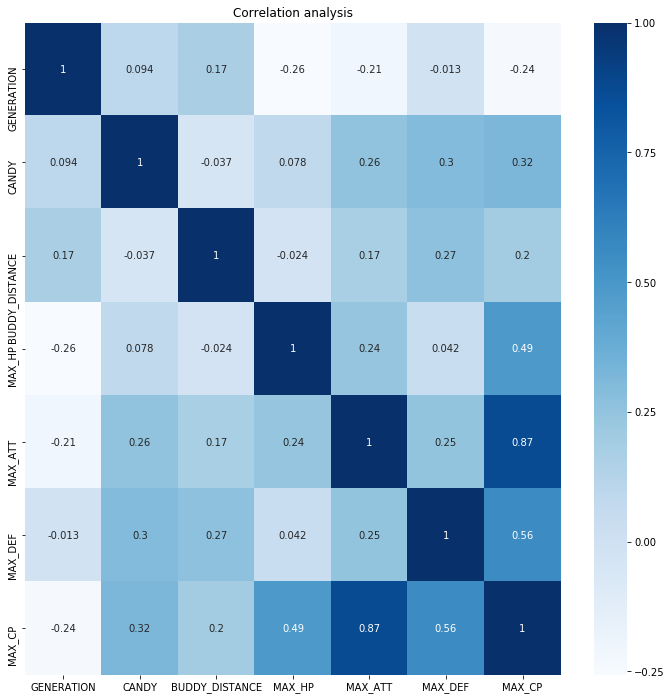

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=[12, 12])
corr_mtx = XY.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

In [26]:
XY2=df.dropna()
XY2.head()

,#,NAME_ENGLISH,NAME_GERMAN,NAME_FRENCH,NAME_JAPAN,NAME_KOREAN,TYP1,TYP2,GENERATION,CANDY,BUDDY_DISTANCE,MAX_HP,MAX_ATT,MAX_DEF,MAX_CP,CATCH_RATE,ESCAPE_RATE,SHINY,ICON_PATH,SPRITE_PATH
0,1,Bulbasaur,Bisasam,Bulbizarre,Fushigidane,Isanghaessi,Grass,Poison,1.0,25.0,3.0,128.0,118.0,111.0,1115.0,"20,00 %","10,00 %",Yes,./icon/001.png,./sprites/001.png
1,2,Ivysaur,Bisaknosp,Herbizarre,Fushigisou,Isanghaepul,Grass,Poison,1.0,100.0,3.0,155.0,151.0,143.0,1699.0,"10,00 %","7,00 %",Yes,./icon/002.png,./sprites/002.png
12,13,Weedle,Hornliu,Aspicot,Beedle,Ppulchungi,Bug,Poison,1.0,12.0,1.0,120.0,63.0,50.0,456.0,"50,00 %","20,00 %",No,./icon/013.png,./sprites/013.png
13,14,Kakuna,Kokuna,Coconfort,Cocoon,Ttakchungi,Bug,Poison,1.0,50.0,1.0,128.0,46.0,75.0,432.0,"25,00 %","9,00 %",No,./icon/014.png,./sprites/014.png
15,16,Pidgey,Taubsi,Roucool,Poppo,Gugu,Normal,Flying,1.0,12.0,1.0,120.0,85.0,73.0,680.0,"50,00 %","20,00 %",No,./icon/016.png,./sprites/016.png


In [28]:
Y2=XY2['MAX_CP']
X2=XY2[['MAX_HP', 'CANDY', 'GENERATION','BUDDY_DISTANCE',]]

In [29]:
lm=LinearRegression()
lm.fit(X2,Y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
lm.coef_

array([  5.75583061,   3.4778564 , -94.91332932,  97.12948713])

In [33]:
lm.score(X2,Y2)
#This result shows that the explaining power of CANDY,GENARATION and  BUDDY_DISTANCE is very low. 

0.4035090918289224

In [34]:
#So we can creat a thrid model,where we add the varible CANDY and see if it has an impact in the explanatory power of the inicial model. 


array([ 1., nan,  2.,  3.,  4.,  5.,  6.,  7.])

In [35]:
XY3=df.dropna()
XY3.head()

,#,NAME_ENGLISH,NAME_GERMAN,NAME_FRENCH,NAME_JAPAN,NAME_KOREAN,TYP1,TYP2,GENERATION,CANDY,BUDDY_DISTANCE,MAX_HP,MAX_ATT,MAX_DEF,MAX_CP,CATCH_RATE,ESCAPE_RATE,SHINY,ICON_PATH,SPRITE_PATH
0,1,Bulbasaur,Bisasam,Bulbizarre,Fushigidane,Isanghaessi,Grass,Poison,1.0,25.0,3.0,128.0,118.0,111.0,1115.0,"20,00 %","10,00 %",Yes,./icon/001.png,./sprites/001.png
1,2,Ivysaur,Bisaknosp,Herbizarre,Fushigisou,Isanghaepul,Grass,Poison,1.0,100.0,3.0,155.0,151.0,143.0,1699.0,"10,00 %","7,00 %",Yes,./icon/002.png,./sprites/002.png
12,13,Weedle,Hornliu,Aspicot,Beedle,Ppulchungi,Bug,Poison,1.0,12.0,1.0,120.0,63.0,50.0,456.0,"50,00 %","20,00 %",No,./icon/013.png,./sprites/013.png
13,14,Kakuna,Kokuna,Coconfort,Cocoon,Ttakchungi,Bug,Poison,1.0,50.0,1.0,128.0,46.0,75.0,432.0,"25,00 %","9,00 %",No,./icon/014.png,./sprites/014.png
15,16,Pidgey,Taubsi,Roucool,Poppo,Gugu,Normal,Flying,1.0,12.0,1.0,120.0,85.0,73.0,680.0,"50,00 %","20,00 %",No,./icon/016.png,./sprites/016.png


In [36]:
Y3=XY2['MAX_CP']
X3=XY2[['MAX_HP', 'MAX_HP', 'MAX_DEF', 'MAX_ATT','CANDY']]

In [41]:
lm=LinearRegression()
lm.fit(X3,Y3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [42]:
lm.coef_

array([2.07901741, 2.07901741, 4.58151401, 8.73357581, 0.05605708])

In [43]:
lm.score(X3,Y3)
#The r-square show a marginal increased, as predicted. The impact of CANDY it in't much significant.

0.9664557143060987